In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [38]:
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [39]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [40]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [41]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [42]:
df.drop(columns=['RowNumber',	'CustomerId',	'Surname'], inplace=True)

In [43]:
print(df.shape)
df.head()

(10000, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [44]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].corr()['Exited'].sort_values()

,Exited
IsActiveMember,-0.156128
NumOfProducts,-0.047820
CreditScore,-0.027094
Tenure,-0.014001
HasCrCard,-0.007138
EstimatedSalary,0.012097
Balance,0.118533
Age,0.285323
Exited,1.000000


In [45]:
x = df.drop('Exited', axis=1)
y = df['Exited']


In [46]:
numer_cols_index = x.select_dtypes(include=['int64', 'float64']).columns
categ_cols_index = x.select_dtypes(include=['object']).columns

categ_cols_index, numer_cols_index


(Index(['Geography', 'Gender'], dtype='object'),
 Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary'],
       dtype='object'))

In [47]:
from sklearn.preprocessing import LabelEncoder

x_cat = x[categ_cols_index].copy()

le = LabelEncoder()
for i in categ_cols_index:
  x_cat[i] = le.fit_transform(x_cat[i])

In [48]:
from sklearn.feature_selection import chi2

chi_scores = chi2(x_cat,y)

chi2_results = pd.DataFrame({
    'Feature': categ_cols_index,
    'Chi2 Score': chi_scores[0],
    'P-value': chi_scores[1].round(3)
})

chi2_results.sort_values(by='P-value')


,Feature,Chi2 Score,P-value
1,Gender,51.539926,0.000
0,Geography,11.853251,0.001


In [49]:
from scipy.stats import f_oneway

anova_scores = []

for i in numeric_cols:
  group1 = df[df['Exited'] == 0][i]
  group2 = df[df['Exited'] == 1][i]

  p_value = f_oneway(group1, group2)[1]
  anova_scores.append((i, round(p_value, 3)))

anova_results = pd.DataFrame(anova_scores, columns=['Feature', 'P-value'])
anova_results.sort_values(by='P-value')

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


,Feature,P-value
1,Age,0.000
3,Balance,0.000
6,IsActiveMember,0.000
4,NumOfProducts,0.000
8,Exited,0.000
0,CreditScore,0.007
2,Tenure,0.162
7,EstimatedSalary,0.226
5,HasCrCard,0.475


In [50]:
selected_features = [
    'CreditScore', 'Age', 'Balance',
    'NumOfProducts', 'IsActiveMember',
    'Geography', 'Gender'
]

x = df[selected_features]
y = df[['Exited']]

x.shape, y.shape


((10000, 7), (10000, 1))

In [51]:
df['Geography'].unique() , df[ 'Gender'].unique()

(array(['France', 'Spain', 'Germany'], dtype=object),
 array(['Female', 'Male'], dtype=object))

In [52]:
x_encoded = pd.get_dummies(x, columns=['Geography','Gender'], drop_first=True)
x_encoded

,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,0.00,1,1,False,False,False
1,608,41,83807.86,1,1,False,True,False
2,502,42,159660.80,3,0,False,False,False
3,699,39,0.00,2,0,False,False,False
4,850,43,125510.82,1,1,False,True,False
...,...,...,...,...,...,...,...,...
9995,771,39,0.00,2,0,False,False,True
9996,516,35,57369.61,1,1,False,False,True
9997,709,36,0.00,1,1,False,False,False
9998,772,42,75075.31,2,0,True,False,True


In [53]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x_encoded,y,test_size=0.2,random_state=0)

xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((8000, 8), (2000, 8), (8000, 1), (2000, 1))

In [54]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
xtrain_scaled = sc.fit_transform(xtrain)
xtest_scaled = sc.fit_transform(xtest)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(xtrain_scaled,ytrain).score(xtest_scaled,ytest)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8135

In [56]:
yhat = model.predict(xtest_scaled)
accuracy_score(ytest,yhat)

0.8135

In [57]:
y_probabilities = model.predict_proba(xtest_scaled)[:, 1]

In [58]:
(yhat == ((y_probabilities >= 0.5).astype(int))).sum()

np.int64(2000)

In [59]:
from sklearn.metrics import confusion_matrix, classification_report, \
ConfusionMatrixDisplay

print(classification_report(ytest,yhat));

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.61      0.22      0.32       405

    accuracy                           0.81      2000
   macro avg       0.72      0.59      0.61      2000
weighted avg       0.79      0.81      0.78      2000



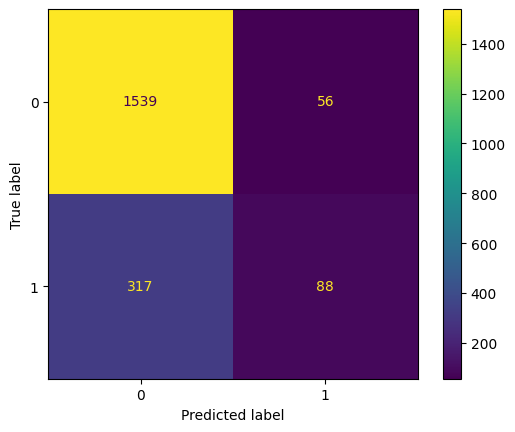

In [60]:
cm = confusion_matrix(ytest,yhat)
ConfusionMatrixDisplay(cm).plot()

# KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier

knnmodel = KNeighborsClassifier(n_neighbors=15)
knnmodel.fit(xtrain_scaled,ytrain).score(xtest_scaled,ytest)

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8535

In [62]:
knnyhat = knnmodel.predict(xtest_scaled)
accuracy_score(ytest,knnyhat)

0.8535

In [63]:
knnpred_probabilities = knnmodel.predict_proba(xtest_scaled)[:,-1]

(knnyhat == (knnpred_probabilities > 0.5).astype(int)).sum()

np.int64(2000)

In [64]:
print(classification_report(ytest,knnyhat));

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.70      0.48      0.57       405

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



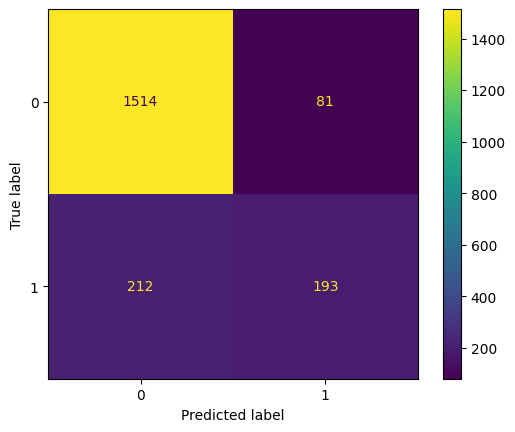

In [65]:
cm = confusion_matrix(ytest,knnyhat)
ConfusionMatrixDisplay(cm).plot()

In [66]:

acc_scores = []

for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k);
    knn.fit(xtrain_scaled, ytrain);
    yhatknn = knn.predict(xtest_scaled);
    acc_scores.append(accuracy_score(ytest, yhatknn));



/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

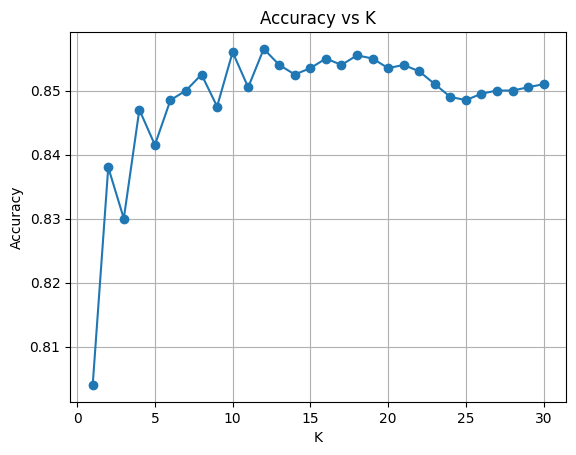

In [67]:

plt.plot(range(1,31), acc_scores, marker='o')
plt.title("Accuracy vs K")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [68]:
# Print best K value

print( "Accuracy:", max(acc_scores));
print("best k = ", acc_scores.index(max(acc_scores))+1)

Accuracy: 0.8565
best k =  12
